# 363-1098-00L Business Analytics FS2020

## Focus: Supervised Machine Learning

Group Members: 
Syed Shahvaiz Ahmed (syahmed)
Nael Prelaz (nprelaz)
Clive Charles Javara (javarac)

Topic: Telecommunication customer retain
Link: Telco Customer Churn
Data Source: Kaggle

Problem Statement: Analyze all relevant data and learn behavior to retain customers.

Motivation:

The primary motivation for attrition rates came during the Business Analytics class only (check submitted presentation) where we had an idea about using ML algorithms to train and retain employees. We wanted to work on similar lines and we found this dataset which differs in a manner that this allows for retaining Telco customers. The dataset is nice and clean and offers a decent prediction problem based on the customer’s behavior. If a company can identify as to which customers are going to cancel their subscriptions then they can target them specifically with offers in order to retain them. The dataset deals with “text” and “numbers” and will give us an exciting opportunity to learn as to how to deal with such a situation (which is pretty common in the industry). 


## Data Set Description: 

Context: "Predict behavior to retain customers. We analyze all relevant customer data and develop focused customer retention programs."

Content: Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

## Description of Variables in the dataset.

- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## Project Overview:

1. Data Overview
    - Missing Value Identification
2. Data Manipulation
3. Exploratory Data Analysis
    - 3.1 Overall distribution of the Churn Variable
    - 3.2 Distribution of Categorical variables across the attrition (Churn and Non Churn)
4. Data preprocessing
5. Model Building
    - 5.1 Logistic Regression
    - 5.2 Support Vector Machine
    - 5.3 Random Forest 
    - 5.4 K Nearest Neigbour
    - 5.5 Decision Trees
    - 5.6 Neural Networks
6. Model Comparison

## Initial Import of Libraries

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [1]:
# Importing all the relevant packages for Exploratory data analysis and Model development.

%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# General math, csv and plotting modules.
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

# Widget and formatting modules
import ipywidgets
from ipywidgets import interact, interactive, interact_manual
import pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] = (10, 5)

# Visualization Libraries
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots


# Loading the required libraries 
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from statistics import mode
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

from plotly import __version__
# %matplotlib inline

# import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

import warnings
warnings.filterwarnings('ignore')



Bad key "text.kerning_factor" on line 4 in
C:\Users\Shahvaiz\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


In [3]:
# def configure_plotly_browser_state():
#   import IPython
#   display(IPython.core.display.HTML('''
#         <script src="/static/components/requirejs/require.js"></script>
#         <script>
#           requirejs.config({
#             paths: {
#               base: '/static/base',
#               plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
#             },
#           });
#         </script>
#         '''))

## 1. Data Overview

In [2]:
# Reading the file that contains the data
# telco_df = pd.read_csv(io.StringIO(uploaded["WA_Fn-UseC_-Telco-Customer-Churn.csv"].decode('utf-8')))
telco_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Showing few rows of the data
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Number of Rows and Columns in the dataset
print ("Rows and Columns: ",telco_df.shape)
# Number of Features that we have to deal with
print ("\n Number of Features : \n",telco_df.columns.tolist())
# To track categorical, binary and textual data
print ("\nUnique values :  \n",telco_df.nunique())

Rows and Columns:  (7043, 21)

 Number of Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### 1.1 Missing value Identification

In [4]:
## To check missing values in terms of spaces. We find out that Total Charges has missing values that need to be removed
def unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

missingvalue = 0
missingcolumn = []
for i in telco_df.columns:
    for j in telco_df[i].tolist():
        if  j == ' ':
            missingvalue += 1
            missingcolumn.append(i)
print("Number of missing values in spaces are: {}".format(missingvalue))
print("Feature name which contains missing values in spaces: {}".format(unique(missingcolumn)))

## To check missing values in terms of null or nan. 
print("Number of missing values in terms of null or nan: {}".format(telco_df.isnull().sum().values.sum()))

Number of missing values in spaces are: 11
Feature name which contains missing values in spaces: ['TotalCharges']
Number of missing values in terms of null or nan: 0


## 2. Data Manipulation

This is a necessary step because then we can categorize a few things. 

Formally stating: 
1. We can remove the missing values of TotalCharges from our analysis
2. Make a few more modifications from the observed categorical variables
3. Make further distinction in our categorical variables 

This is done so that we can start with our Exploratory Data Analysis

Side Note: Confidence was garnered after we looked at the dataset properly in STATA

In [5]:
# Replacing and Removing the missing values that were identified in the part before
telco_df['TotalCharges'] = telco_df["TotalCharges"].replace(' ',np.nan)
telco_df = telco_df[telco_df["TotalCharges"].notnull()]
print(telco_df.shape) # Notice that the row size has reduced by 11.
telco_df = telco_df.reset_index()[telco_df.columns]

#convert to float type
telco_df["TotalCharges"] = telco_df["TotalCharges"].astype(float)

# To align data set in "Yes and No" settings. Can account for 17 variables in this manner.
categorical_df = telco_df.loc[:, telco_df.dtypes == "object"]
del categorical_df['customerID']
for col in categorical_df.columns.tolist():
    print(telco_df[col].value_counts())
print(telco_df['SeniorCitizen'].value_counts())

(7032, 21)
Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: 

In [6]:
# Replacing 'No internet service' to No for the following columns (can also be found in Variable description above)
align_columns = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for i in align_columns : 
    telco_df[i]  = telco_df[i].replace({'No internet service' : 'No'})

#Similarly for "MultipleLines" variable we replace 'No phone service' to No
telco_df['MultipleLines'] = telco_df['MultipleLines'].replace({'No phone service': 'No'})
    
# Similarly for the variable "Senior Citizen" we convert it into values 
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Separating churn and non churn customer datasets
churn     = telco_df[telco_df["Churn"] == "Yes"]
non_churn = telco_df[telco_df["Churn"] == "No"]

#Separating catagorical and numerical columns for EDA
Id_col     = ['customerID']
target_col = ["Churn"]
numeric_columns = telco_df._get_numeric_data().columns.tolist()
categorical_columns = list(set(telco_df.columns.tolist())- set(numeric_columns) - set(Id_col) - set(target_col))
print("Number of Categorical Features: ", len(categorical_columns))
print("Number of Numeric Features: ", len(numeric_columns))

Number of Categorical Features:  16
Number of Numeric Features:  3


## 3. Exploratory Data Analysis

We have a feature set of 19 columns that need to be explored in their connection with Churn and Non-Churn.

### 3.1 Overall distribution of the Churn Variable

In [7]:
# Visualizing Churn and Non-Churn percentage using plotly library

trace_pie = go.Pie(labels = telco_df['Churn'].value_counts().keys().tolist(),
                  values = telco_df['Churn'].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  marker = dict(colors=['lightblue','gold'], 
                           line=dict(color='#000000', width=1.5)),
                  rotation = 90,
                  hoverinfo = "label +value")

layout = dict(title =  'Distribution of Churn and Non-Churn Customers',
                        autosize = False,
                        height  = 500,
                        width   = 800)


fig = go.Figure(dict(data = [trace_pie], layout=layout))
# configure_plotly_browser_state()
py.iplot(fig)

### 3.2 Distribution of Categorical variables across the attrition *(Churn and Non Churn)*

In [8]:
# Defining a function so we can use it for all the categorical variables that were defined above. 
# We will use the same code that was defined above (a bit modified ofcourse).
def pie_plot_func (column_name):
    
    # For Churn customers (Section 2)
    trace_pie_1 = go.Pie(labels = churn[column_name].value_counts().keys().tolist(),
                  values = churn[column_name].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  hole = 0.6,
                  hoverinfo = "label+percent",
                  domain = dict(x = [0,.48]),
                  name = "Churn Customers",
                  marker = dict(colors=['lightblue','gold', 'purple', 'red'],line = dict(width = 2, color = '#000000')))
    
    # For Non Churn customers (Section 2)
    trace_pie_2 = go.Pie(labels = non_churn[column_name].value_counts().keys().tolist(),
                  values = non_churn[column_name].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  hole = 0.6,
                  hoverinfo = "label+percent",
                  domain = dict(x = [.52,1]),
                  name = "Non churn customers",
                  marker = dict(colors=['lightblue','gold', 'purple', 'red'],line = dict(width = 2,color = '#000000')))
    
    # Defining layout for the traces
    layout = dict(title = column_name + " distribution in Churn/NonChurn",  autosize = False,
                  height = 500,
                  width = 900,
                  annotations = [dict(text = "Churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                 dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .87,y = .5
                                               )])
    fig = dict(data = [trace_pie_1, trace_pie_2], layout = layout)
#     configure_plotly_browser_state()
    py.iplot(fig)

for var in categorical_columns:
    pie_plot_func(var)

### 3.3 Distribution of Numerical variables across the attrition (Churn and Non Churn)

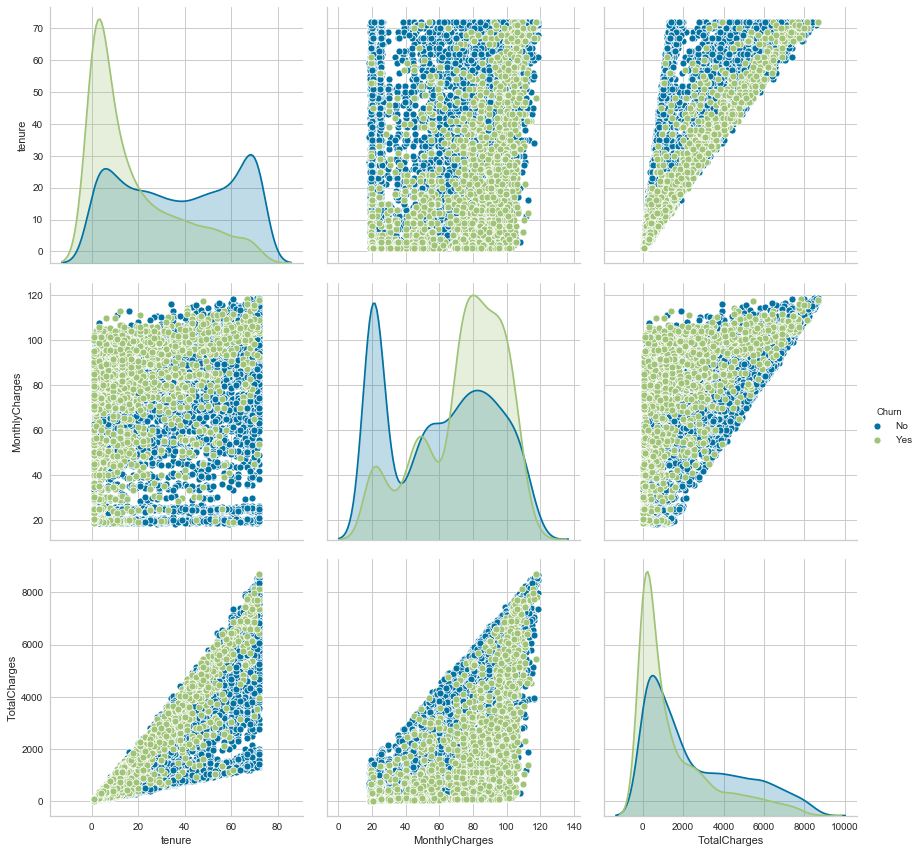

In [9]:
#2_d Scatter plot with color-coding for each feature type using seaborn 
sns.set_style("whitegrid");
sns.pairplot(telco_df,hue="Churn",size=4);
plt.show();

Few things to note from the seaborne plot above is that the highest churn customers were in the bracket of low tenure and high monthly charges. We also see a clear cut positive relationship between tenure and total charges. This kind of exploration is important as it will be used later in feature engineering for models. 

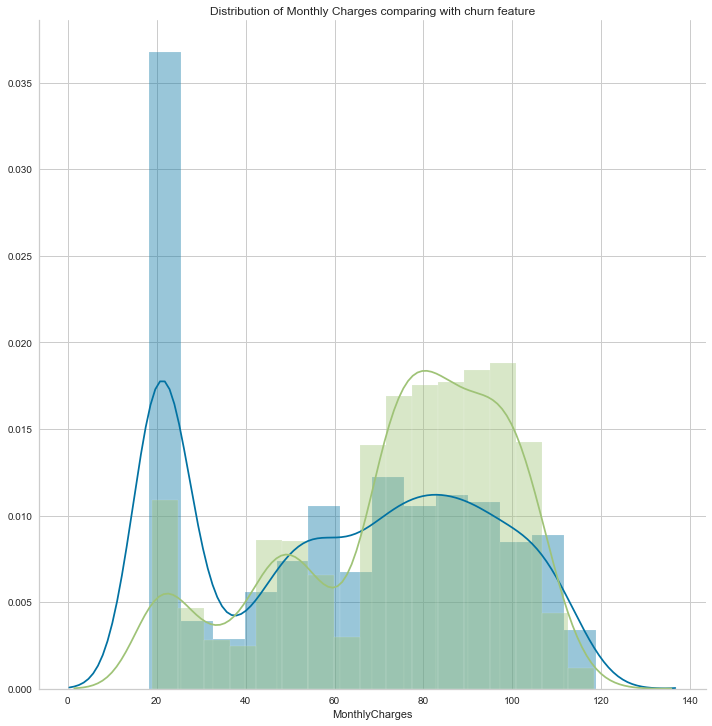

In [10]:
# Exploring the monthly charges feature
plot = sns.set_style("whitegrid");
sns.FacetGrid(telco_df, hue="Churn", size=10, margin_titles = True) \
   .map(sns.distplot,"MonthlyCharges",)
plt.title('Distribution of Monthly Charges comparing with churn feature')
plt.show();

Higher Monthly charges lead to a higher attrition rate.

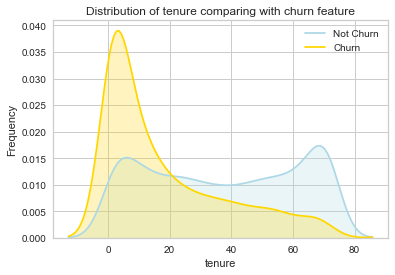

In [11]:
# Exploring the tenure feature
g = sns.kdeplot(telco_df.tenure[(telco_df["Churn"] == 'No') ], color="lightblue", shade = True)
g = sns.kdeplot(telco_df.tenure[(telco_df["Churn"] == 'Yes') ], ax =g, color="gold", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

Customers who Churn are often new customers. Their tenure track is quite low.

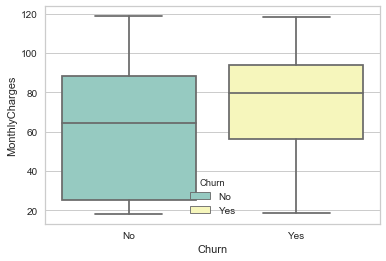

In [12]:
# Exploring the Monthly Charges feature
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', hue = 'Churn', data = telco_df, palette="Set3", dodge = False)
plt.show()

What we also see from here is that people who Churn have relatively high Monthly Charges as compared to customers who don't churn.

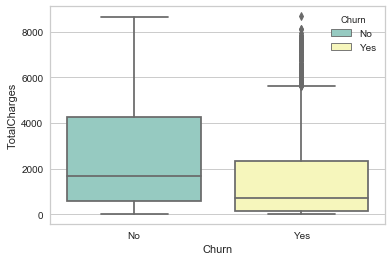

In [13]:
# Exploring the Total Charges feature
sns.boxplot(x = 'Churn', y = 'TotalCharges', hue = 'Churn', data = telco_df, palette="Set3", dodge = False)
plt.show()

What we also see from here is that people who Churn have relatively low Total Charges as compared to customers who don't churn.

## 4. Data Preprocessing for Models



In [14]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#Drop customer ID as it wont affect the churning rate at all
df_tele = telco_df.copy(deep = False)
df_tele.drop(['customerID'], axis=1, inplace=True)

def tenure_cateorize(df_tele) :
    if df_tele["tenure"] <= 12 :
        return "0-12 Mts."
    elif (df_tele["tenure"] > 12) & (df_tele["tenure"] <= 24 ):
        return "12-24 Mts."
    elif (df_tele["tenure"] > 24) & (df_tele["tenure"] <= 48) :
        return "24-48 Mts."
    elif (df_tele["tenure"] > 48) & (df_tele["tenure"] <= 60) :
        return "48-60 Mts."
    elif df_tele["tenure"] > 60 :
        return "grt_60 Mts."
    
df_tele["Tenure_Group"] = df_tele.apply(lambda df_tele:tenure_cateorize(df_tele),axis = 1)

#Seperate feature Tenure_Group with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Tenure_Group'])

#Seperate feature Paymentvalues with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['PaymentMethod'])

#Seperate feature Contracts with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Contract'])

#Seperate feature Internet Service with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['InternetService'])

#Separating catagorical and numerical columns for EDA
Id_col     = ['customerID']
target_col = ["Churn"]
numeric_columns = df_tele._get_numeric_data().columns.tolist()
categorical_columns = list(set(df_tele.columns.tolist())- set(numeric_columns) - set(Id_col))
print("Number of Categorical Features: ", len(categorical_columns))
print("Number of Numeric Features: ", len(numeric_columns))

cat_df = df_tele[categorical_columns]
num_df = df_tele[numeric_columns]

# Encoding numerical values to each feature. 
label_encoder = LabelEncoder()
column_names = list(df_tele.columns)

mappings_list = []
for i in range(len(cat_df.columns.tolist())): 
    df = cat_df.iloc[:,i]
    df = label_encoder.fit_transform(df)
    mappings = {index: label for index, label in 
                      enumerate(label_encoder.classes_)}
    mappings_list.append([mappings])


# Creating a dataframe which records all the mappings. 
mappings_df = pd.concat([pd.DataFrame(cat_df.columns.tolist(), columns = ['Features']),
             pd.DataFrame(mappings_list, columns = ['Mappings'])], axis =1 , sort = False)
display(mappings_df)
# Creating an encoded data frame from the previous one (to be used for model building). 
cat_en_df = cat_df.apply(label_encoder.fit_transform)

df_tele_en = pd.concat([num_df, cat_en_df], axis = 1, sort = False )
print(len(df_tele_en.columns.tolist()))

Number of Categorical Features:  14
Number of Numeric Features:  18


,Features,Mappings
0,Dependents,"{0: 'No', 1: 'Yes'}"
1,Partner,"{0: 'No', 1: 'Yes'}"
2,PhoneService,"{0: 'No', 1: 'Yes'}"
3,DeviceProtection,"{0: 'No', 1: 'Yes'}"
4,OnlineSecurity,"{0: 'No', 1: 'Yes'}"
5,TechSupport,"{0: 'No', 1: 'Yes'}"
6,StreamingMovies,"{0: 'No', 1: 'Yes'}"
7,OnlineBackup,"{0: 'No', 1: 'Yes'}"
8,Churn,"{0: 'No', 1: 'Yes'}"
9,MultipleLines,"{0: 'No', 1: 'Yes'}"


32


In [15]:
#Here we standardize the remaining two columns totalcharges and MonthlyCharges 
df_tele_en[['TotalCharges', 'MonthlyCharges']] = StandardScaler().fit_transform(df_tele_en[['TotalCharges', 'MonthlyCharges']])
pd.set_option('display.max_columns', None)
df_tele_en.head()

,tenure,MonthlyCharges,TotalCharges,Tenure_Group_0-12 Mts.,Tenure_Group_12-24 Mts.,Tenure_Group_24-48 Mts.,Tenure_Group_48-60 Mts.,Tenure_Group_grt_60 Mts.,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Dependents,Partner,PhoneService,DeviceProtection,OnlineSecurity,TechSupport,StreamingMovies,OnlineBackup,Churn,MultipleLines,gender,PaperlessBilling,SeniorCitizen,StreamingTV
0,1,-1.161694,-0.994194,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,34,-0.260878,-0.173740,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0
2,2,-0.363923,-0.959649,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0
3,45,-0.747850,-0.195248,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0
4,2,0.196178,-0.940457,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


## 5. Model Building

A number of various models will be tested and their performance will be compared against each other.

#### - Setting overall train and test splits

In [16]:
# Setting the target and feature space
x_trn = df_tele_en.loc[:, df_tele_en.columns != 'Churn']
x_trn.drop(['tenure'], axis =1, inplace = True)
y_trn = df_tele_en['Churn']

# Setting the same test and train split for al models so its easy to compare (at 25% split)
x_train, x_test, y_train, y_test = train_test_split(x_trn, y_trn, test_size=0.25, random_state=0)

#### - Running PCA for dimensionality reduction

Explained variance: 1.0


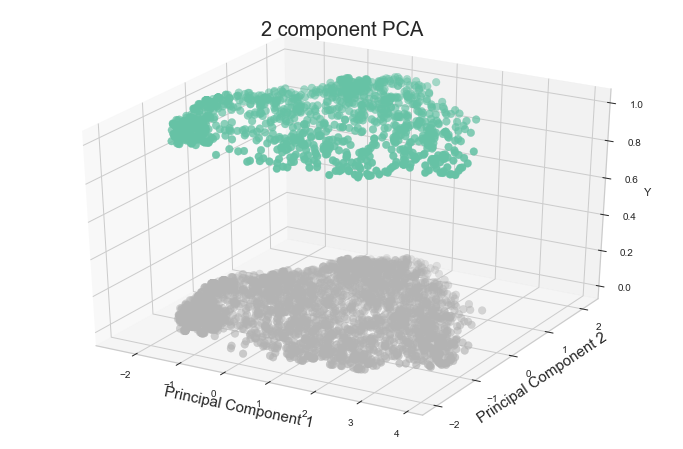

In [17]:
# Running PCA 
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca.fit(x_train)

principalDf = pd.DataFrame(data = x_train
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel("Y")
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
ax.scatter3D(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['Churn'], c = finalDf['Churn'], cmap="Set2_r",s = 60)
ax.grid()

print('Explained variance: {}'.format(np.sum(pca.explained_variance_ratio_)))

#### - Plotting function for ROC Curve, Heatmaps, Threshold plots, and Model comparision functions.

In [18]:
# Building some visualization functions to be used for each model as well as model comparisions
def roc_conf_plot(classifier, x_train = None, y_train = None, x_test = None,  y_test = None):
    
    # Fitting the model
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    roc_score = roc_auc_score(y_test, y_pred)
    prob = classifier.predict_proba(x_test)
    
    # Setting traces for the ROC plot
    fpr,tpr,thresholds = roc_curve(y_test,prob[:,1])
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(roc_score),
                        line = dict(color = ('purple'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('red'),width = 2,
                        dash = 'dot'))
    Layout = go.Layout(dict(title = "Receiver Operator Characteristics Curve",
                           showlegend = False,
                           xaxis = dict(title = "False positive rate",
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "True positive rate",
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2)
                           )
                           )
    data = [trace1, trace2]
#     configure_plotly_browser_state()
    fig = go.Figure(data= data, layout = Layout)
    
    # Plotting the Confusion matrix
    # cmap = sns.cm.rocket_r
    # sns.set(font_scale=1.4)
    # conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
    # sns.heatmap(conf_df, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap)
    
    # plt.show()
    py.iplot(fig)
    # configure_plotly_browser_state()
    print("Area under curve : ", roc_score)

# Generates the threshold plot for the specified model
def threshold_plot(algorithm, x, y):
  visualizer = DiscriminationThreshold(algorithm)
  visualizer.fit(x,y)
  visualizer.poof()


# Creating row table for the metric comparision of each model.
def model_metric(model, x_train, y_train, x_test, y_test, name):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    roc = roc_auc_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    row_df = pd.DataFrame({
                       "Model"           : [name],
                       "Accuracy_score"  : [acc],
                       "Recall_score"    : [recall],
                       "Precision"       : [prec],
                       "f1_score"        : [f1],
                       "Area_under_curve": [roc],
                       "Kappa_metric"    : [kappa],
    })
    return row_df





### 5.1. Baseline Model - Logistic Regression with Cross Validation

In [19]:
# Model training using LogisticRegressionCV using a l1 penalty for feature elimination
model_LCV = LogisticRegressionCV(cv = 50, fit_intercept = False, solver= 'lbfgs', penalty = 'l2',max_iter = 10000000).fit(x_train, y_train)
model_LCV.fit(x_train,y_train)
y_pred_LCV = model_LCV.predict(x_test)
accuracy = model_LCV.score(x_test,y_test)

In [ ]:
print(recall_score(y_test, y_pred_LCV))
print(precision_score(y_test, y_pred_LCV))
print(accuracy_score(y_test, y_pred_LCV))
print(confusion_matrix(y_test,y_pred_LCV))
print(classification_report(y_test,y_pred_LCV))
print("Area under curve : ", roc_auc_score(y_test, y_pred_LCV))

roc_conf_plot(model_LCV, x_train, y_train, x_test, y_test)
threshold_plot(model_LCV, x_train, y_train)
LCV_model = model_metric(model_LCV,x_train,y_train,x_test,y_test, "Logistic Regression CV")

0.8635346756152126
0.4562647754137116
0.7036405005688282
[[851 460]
 [ 61 386]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1311
           1       0.46      0.86      0.60       447

    accuracy                           0.70      1758
   macro avg       0.69      0.76      0.68      1758
weighted avg       0.81      0.70      0.72      1758

Area under curve :  0.7563287413163782


Area under curve :  0.7563287413163782


### 5.2 Support Vector Machines 

In [ ]:
#Check for the best parameters
parameters = {'kernel':( 'linear','rbf','sigmoid'), 'C':[3,10,100]}
model_SVC = SVC()
svclassifier_cv = GridSearchCV(model_SVC,parameters)
svclassifier_cv.fit(x_train,y_train)
print("Tuned hyperparameters :(best parameters) ",svclassifier_cv.best_params_)


In [ ]:
# Use the best parameters to fit the model
model_SVC = SVC(kernel='rbf',C=3, probability = True)
model_SVC.fit(x_train, y_train)
model_SVC.score(x_test,y_test)
y_pred_SVC = svclassifier_cv.predict(x_test)

print(confusion_matrix(y_test,y_pred_SVC))
print(classification_report(y_test,y_pred_SVC))

roc_conf_plot(model_SVC, x_train, y_train, x_test, y_test)
threshold_plot(model_SVC, x_train, y_train)
SVM_model = model_metric(model_SVC,x_train,y_train,x_test,y_test, "Support Vector Machine")

### 5.3 Random Forest

In [ ]:
parameters= {'n_estimators':[10,50,100,500,1000],'max_depth': range(1,20,2)}
RFC = RandomForestClassifier()
RFC_cv = GridSearchCV(RFC,parameters)
RFC_cv.fit(x_train,y_train)
print("Tuned hyperparameters :(best parameters) ",RFC_cv.best_params_)

In [ ]:
model_RFC = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
model_RFC.fit(x_train, y_train)
accuracy = model_RFC.score(x_test, y_test)
y_pred_RFC = model_RFC.predict(x_test)
print(accuracy)

In [ ]:
print(recall_score(y_test, y_pred_RFC))
print(precision_score(y_test, y_pred_RFC))
print(accuracy_score(y_test, y_pred_RFC))
print(confusion_matrix(y_test,y_pred_RFC))
print(classification_report(y_test,y_pred_RFC)) 

roc_conf_plot(model_RFC, x_train, y_train, x_test, y_test)
threshold_plot(model_RFC, x_train, y_train)
RF_model = model_metric(model_RFC,x_train,y_train,x_test,y_test, "Random Forest")

### 5.4 K Nearest Neighbour

In [ ]:
grid = {"n_neighbors":[1,2,4,5,6,7,8,9,10]}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=10)
knn_cv.fit(x_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)

model_KNN = KNeighborsClassifier(n_neighbors=9)
model_KNN.fit(x_train,y_train)
y_pred_KNN = model_KNN.predict(x_test)

print(recall_score(y_test, y_pred_KNN))
print(precision_score(y_test, y_pred_KNN))
print(accuracy_score(y_test, y_pred_KNN))
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

roc_conf_plot(model_KNN, x_train, y_train, x_test, y_test)
threshold_plot(model_KNN, x_train, y_train)
knn_model = model_metric(model_KNN,x_train,y_train,x_test,y_test, "K - NN")

### 5.5 Decision Trees

In [ ]:
model_DT = DecisionTreeClassifier(criterion="entropy",random_state=0)
model_DT.fit(x_train,y_train)
y_pred_DT = model_DT.predict(x_test)

print(recall_score(y_test, y_pred_DT))
print(precision_score(y_test, y_pred_DT))
print(accuracy_score(y_test, y_pred_DT))
print(confusion_matrix(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))


roc_conf_plot(model_DT, x_train, y_train, x_test, y_test)
threshold_plot(model_DT, x_train, y_train)
DT_model = model_metric(model_DT,x_train,y_train,x_test,y_test, "Decision Tree")

### 5.6 Neural Network

In [ ]:
model_NN = Sequential()
classes=1
model_NN.add(Dense(24,activation='relu',input_dim=2,kernel_initializer='glorot_uniform', bias_initializer='zeros')) 
model_NN.add(Dense(classes,activation='sigmoid'))

model_NN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
np.random.seed(7)
history = model_NN.fit(x_train, y_train,shuffle=True,
          batch_size=5, epochs=70,verbose=1,validation_split=0.2)
y_pred_NN = model_NN.predict(x_test)
y_pred_NN =(y_pred_NN>0.5)   
eval_model = model_NN.evaluate(x_test, y_test,verbose=0)

In [ ]:
print(confusion_matrix(y_test,y_pred_NN))
print(classification_report(y_test,y_pred_NN))
print(recall_score(y_test,y_pred_NN))
print(precision_score(y_test,y_pred_NN))
print(accuracy_score(y_test,y_pred_NN))

cmap = sns.cm.rocket_r
sns.set(font_scale=1.4)
conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred_NN).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
sns.heatmap(conf_df, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap)
plt.show()
roc_score = roc_auc_score(y_test, y_pred_NN)
print(roc_score)

NN_df = pd.DataFrame({
                       "Model"           : ["Neural Network"],
                       "Accuracy_score"  : [accuracy_score(y_test,y_pred_NN)],
                       "Recall_score"    : [recall_score(y_test,y_pred_NN)],
                       "Precision"       : [precision_score(y_test,y_pred_NN)],
                       "f1_score"        : [f1_score(y_test,y_pred_NN)],
                       "Area_under_curve": [roc_auc_score(y_test, y_pred_NN)],
                       "Kappa_metric"    : [cohen_kappa_score(y_test,y_pred_NN)],
})

## 6. Model Comparison

In [ ]:
# We used the model comparision function after each model to record model performance
# Now concatinating the all models to make a combined dataframe
model_comparison_df = pd.concat([LCV_model,RF_model,knn_model,SVM_model, NN_df], ignore_index=True,axis= 0, sort= False)
display(model_comparison_df)

In [ ]:
# Plotting Accuracy scores and Area under curve comparison plots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x = model_comparison_df['Accuracy_score'].tolist(),
    y = model_comparison_df['Model'].tolist(),
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Accuracy score of each model',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x= model_comparison_df['Area_under_curve'].tolist(), 
    y= model_comparison_df['Model'].tolist(),
    mode = 'lines+markers',
    line_color = 'rgb(128, 0, 128)',
    name = 'Area under curve of each model',
), 1, 2)

fig.update_layout(
    title='Area under curve and Accuracy score of Each model',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.05, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.1,
    ),
    legend=dict(x=0.029, y=1.038, font_size=8),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(model_comparison_df['Accuracy_score'].tolist(), decimals=3)
y_nw = np.rint(model_comparison_df['Accuracy_score'].tolist())

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, model_comparison_df['Model']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn ,
                            text='{:,}'.format(ydn) + 'M',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='red'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.08, y=-0.109,
                        text='Telco Churn Dataset"' +
                             '(Accessed on 05 March 2020)',
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
# configure_plotly_browser_state()
fig.show()

In [ ]:
# Plotting all confusion matrix for all models
y = [y_pred_LCV, y_pred_SVC, y_pred_RFC, y_pred_KNN, y_pred_DT, y_pred_NN]

conf_df_LCV = pd.DataFrame(confusion_matrix(y_test,y_pred_LCV).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_SVC = pd.DataFrame(confusion_matrix(y_test,y_pred_SVC).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_RFC = pd.DataFrame(confusion_matrix(y_test,y_pred_RFC).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_KNN = pd.DataFrame(confusion_matrix(y_test,y_pred_KNN).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_DT = pd.DataFrame(confusion_matrix(y_test,y_pred_DT).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])
conf_df_NN = pd.DataFrame(confusion_matrix(y_test,y_pred_NN).tolist(), columns = ['Positive','Negative'], index = ['Positive','Negative'])

fig, (ax1, ax2, ax3) = plt.subplots(3,2, figsize=(18,15))
sns.heatmap(conf_df_LCV, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax1[0])
sns.heatmap(conf_df_SVC, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax1[1])
sns.heatmap(conf_df_RFC, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax2[0])
sns.heatmap(conf_df_KNN, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax2[1])
sns.heatmap(conf_df_DT, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax=ax3[0])
sns.heatmap(conf_df_NN, annot=True, annot_kws={"size": 16}, fmt=".0f", vmin=-0.05, cmap = cmap, ax = ax3[1])

ax1[0].set_title('Logistic Regression CV', color = 'purple')
ax1[1].set_title('Support Vector Mahine', color = 'purple')
ax2[0].set_title('Random Forest', color = 'purple')
ax2[1].set_title('K Nearest Neighbors', color = 'purple')
ax3[0].set_title('Decision Trees', color = 'purple')
ax3[1].set_title('Neural Network', color = 'purple')


plt.subplots_adjust(wspace = .3,hspace = .5)
plt.show()


In [ ]:
#Plotting all Precision Recall curves together. Acknowledgement must be given to Pavan for constructing the original method for plotting.
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from matplotlib.pyplot import figure
import itertools


lst    = [model_LCV,model_SVC,model_RFC,model_KNN,model_DT]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)',
          'SVM Classifier Linear',
          'Random Forest Classifier',
          'KNN Classifier',
          'Decision Tree']

figure(num=None, figsize=(20, 30), dpi=80, facecolor='w', edgecolor='k')
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(x_test)
    predictions   = i.predict(x_test)
    recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
    
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("Average PCN : {}".format(np.around(average_precision_score(y_test,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = 0.5)
    plt.legend(loc = "upper right",
               prop = {"size" : 13})
    qx.set_facecolor("w")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "black")
    plt.xlabel("recall",fontsize =13)
    plt.ylabel("precision",fontsize =13)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))